In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from pmdarima import AutoARIMA
import pmdarima as pm

from datetime import timedelta

sns.set()
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('./data/countries-aggregated.csv')
df

,Country,Latitude,Longitude,Date,confirmed,recovered,Deaths,active_cases
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0
1,Afghanistan,33.939110,67.709953,2020-01-23,0,0,0,0
2,Afghanistan,33.939110,67.709953,2020-01-24,0,0,0,0
3,Afghanistan,33.939110,67.709953,2020-01-25,0,0,0,0
4,Afghanistan,33.939110,67.709953,2020-01-26,0,0,0,0
...,...,...,...,...,...,...,...,...
55665,Zimbabwe,-19.015438,29.154857,2020-11-05,8444,7975,248,469
55666,Zimbabwe,-19.015438,29.154857,2020-11-06,8471,7983,250,488
55667,Zimbabwe,-19.015438,29.154857,2020-11-07,8498,7995,251,503
55668,Zimbabwe,-19.015438,29.154857,2020-11-08,8531,8005,253,526


In [3]:
df_Germany = df[df['Country'] == 'Germany']
df_Germany

,Country,Latitude,Longitude,Date,confirmed,recovered,Deaths,active_cases
19338,Germany,51.165691,10.451526,2020-01-22,0,0,0,0
19339,Germany,51.165691,10.451526,2020-01-23,0,0,0,0
19340,Germany,51.165691,10.451526,2020-01-24,0,0,0,0
19341,Germany,51.165691,10.451526,2020-01-25,0,0,0,0
19342,Germany,51.165691,10.451526,2020-01-26,0,0,0,0
...,...,...,...,...,...,...,...,...
19626,Germany,51.165691,10.451526,2020-11-05,631172,394616,11110,236556
19627,Germany,51.165691,10.451526,2020-11-06,653992,405809,11240,248183
19628,Germany,51.165691,10.451526,2020-11-07,668114,413484,11306,254630
19629,Germany,51.165691,10.451526,2020-11-08,682624,421151,11372,261473


In [4]:
df_Germany['new_cases']= df_Germany['confirmed']-df_Germany['confirmed'].shift(1)
df_Germany['new_deaths']= df_Germany['Deaths']-df_Germany['Deaths'].shift(1)

df_Germany.dropna()

,Country,Latitude,Longitude,Date,confirmed,recovered,Deaths,active_cases,new_cases,new_deaths
19339,Germany,51.165691,10.451526,2020-01-23,0,0,0,0,0.0,0.0
19340,Germany,51.165691,10.451526,2020-01-24,0,0,0,0,0.0,0.0
19341,Germany,51.165691,10.451526,2020-01-25,0,0,0,0,0.0,0.0
19342,Germany,51.165691,10.451526,2020-01-26,0,0,0,0,0.0,0.0
19343,Germany,51.165691,10.451526,2020-01-27,1,0,0,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
19626,Germany,51.165691,10.451526,2020-11-05,631172,394616,11110,236556,22561.0,161.0
19627,Germany,51.165691,10.451526,2020-11-06,653992,405809,11240,248183,22820.0,130.0
19628,Germany,51.165691,10.451526,2020-11-07,668114,413484,11306,254630,14122.0,66.0
19629,Germany,51.165691,10.451526,2020-11-08,682624,421151,11372,261473,14510.0,66.0


In [5]:
## Making time-series data
df_Germany['Date'] = pd.to_datetime(df_Germany['Date'])



In [6]:
df_Germany.set_index('Date',inplace = True)


In [7]:
df_Germany.dropna()

,Country,Latitude,Longitude,confirmed,recovered,Deaths,active_cases,new_cases,new_deaths
Date,,,,,,,,,
2020-01-23,Germany,51.165691,10.451526,0,0,0,0,0.0,0.0
2020-01-24,Germany,51.165691,10.451526,0,0,0,0,0.0,0.0
2020-01-25,Germany,51.165691,10.451526,0,0,0,0,0.0,0.0
2020-01-26,Germany,51.165691,10.451526,0,0,0,0,0.0,0.0
2020-01-27,Germany,51.165691,10.451526,1,0,0,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...
2020-11-05,Germany,51.165691,10.451526,631172,394616,11110,236556,22561.0,161.0
2020-11-06,Germany,51.165691,10.451526,653992,405809,11240,248183,22820.0,130.0
2020-11-07,Germany,51.165691,10.451526,668114,413484,11306,254630,14122.0,66.0


In [8]:
df_Germany['new_cases']

Date
2020-01-22        NaN
2020-01-23        0.0
2020-01-24        0.0
2020-01-25        0.0
2020-01-26        0.0
               ...   
2020-11-05    22561.0
2020-11-06    22820.0
2020-11-07    14122.0
2020-11-08    14510.0
2020-11-09     6522.0
Name: new_cases, Length: 293, dtype: float64

In [9]:
def timeCompare(case):
    f,ax=plt.subplots(figsize=(16,5))
    labels='Germany' 
    country=df_Germany
    plt.plot(country.index,country[case],linewidth=2)
    plt.xticks(country.resample('M').min().index)
    plt.legend(labels)
    ax.set(title=f' Evolution of actual {case} in Germany', ylabel='Number of cases')

    plt.legend(labels)


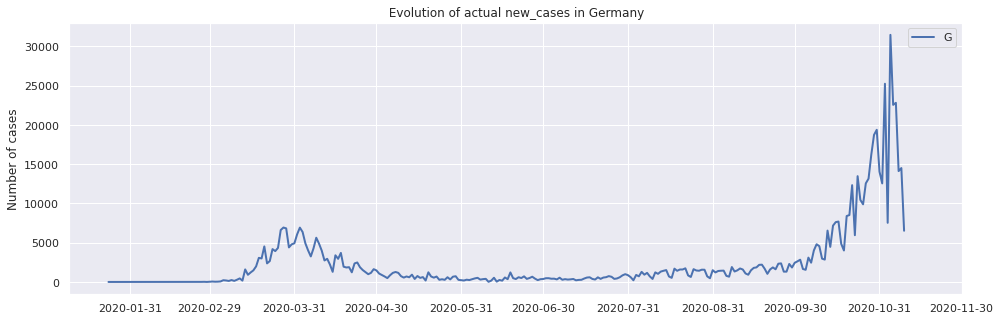

In [10]:
timeCompare('new_cases')

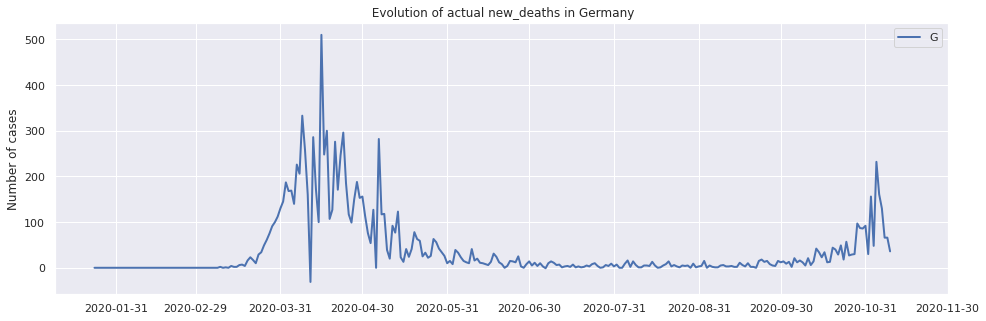

In [11]:
timeCompare('new_deaths')

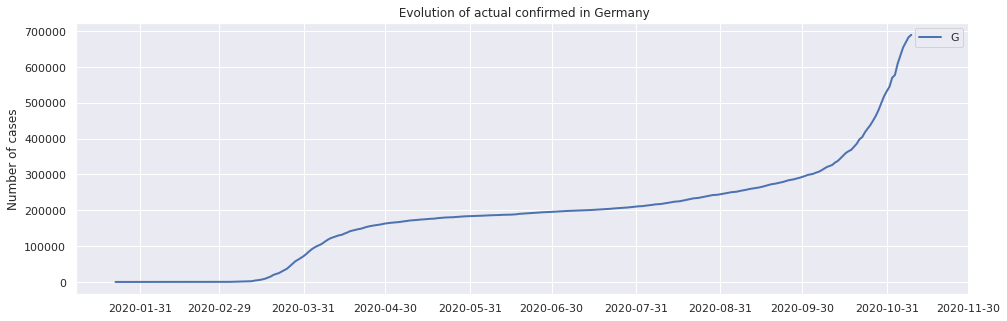

In [12]:
timeCompare('confirmed')

In [13]:
sns.set(palette = 'Set1',style='darkgrid')
#Function for making a time series  and plotting the rolled mean and standard 



def rollPlot(case):
    ts=df_Germany 
    
    
    plt.figure(figsize=(16,6))
    plt.plot(ts[case].rolling(window=7,center=False).mean().dropna(),label='Rolling Mean')
    plt.plot(ts[case].rolling(window=7,center=False).std(),label='Rolling std')
    plt.legend()
    plt.title('Cases distribution with rolling mean and standard deviation in Germany')
    plt.xticks([])

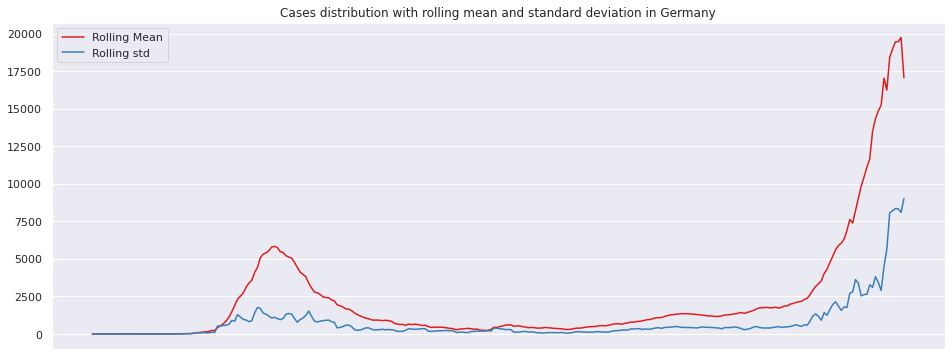

In [14]:
rollPlot('new_cases')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

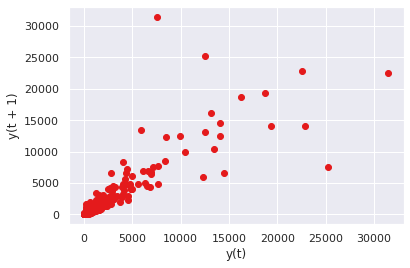

In [15]:
# lag plots to find pattern

pd.plotting.lag_plot(df_Germany['new_cases'])

In [16]:
def corr(ts):
    plot_acf(ts,lags=7,title="ACF")
    plot_pacf(ts,lags=7,title="PACF")
    


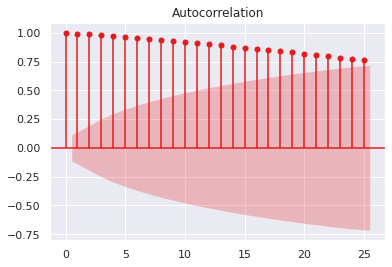

In [17]:
p1=plot_acf(df_Germany['Deaths'])

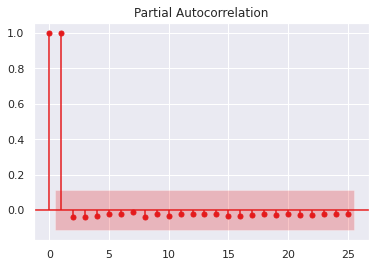

In [18]:
p2= plot_pacf(df_Germany['Deaths'])

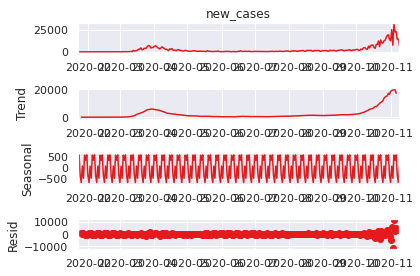

In [19]:
# naive seasonal decomposition

fig=sm.tsa.seasonal_decompose(df_Germany['new_cases'].dropna(),model='additive').plot()

<AxesSubplot:xlabel='Date'>

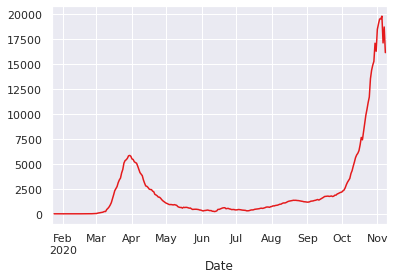

In [20]:
#manual decomposition of trend

trend = df_Germany['new_cases'].rolling(7, center=True, min_periods=5).mean()
trend.plot()

<AxesSubplot:xlabel='Date'>

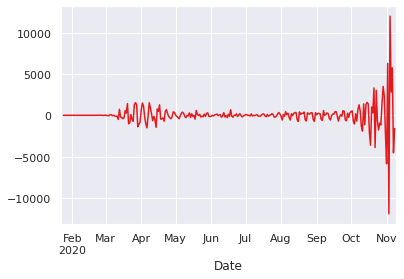

In [21]:
seasonal_remainder = df_Germany['new_cases'] - trend
seasonal_remainder.plot()

<AxesSubplot:xlabel='Date'>

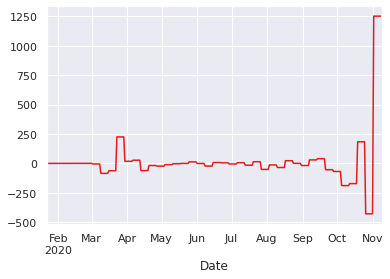

In [22]:
seasonal_week = seasonal_remainder.groupby(df_Germany['new_cases'].index.week).transform('mean')
seasonal_week.plot()

<AxesSubplot:xlabel='Date'>

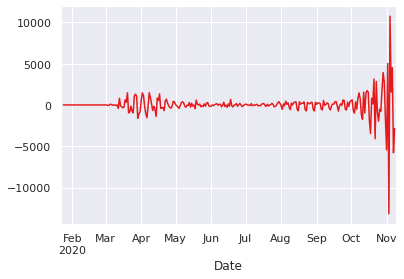

In [23]:
remainder = df_Germany['new_cases'] - trend - seasonal_week
remainder.plot()

In [24]:
remainder.reset_index()


,Date,new_cases
0,2020-01-22,NaN
1,2020-01-23,NaN
2,2020-01-24,0.279365
3,2020-01-25,-0.187302
4,2020-01-26,-0.092063
...,...,...
288,2020-11-05,1556.207483
289,2020-11-06,4490.921769
290,2020-11-07,-5797.959184
291,2020-11-08,-2847.792517


<AxesSubplot:xlabel='new_cases', ylabel='Density'>

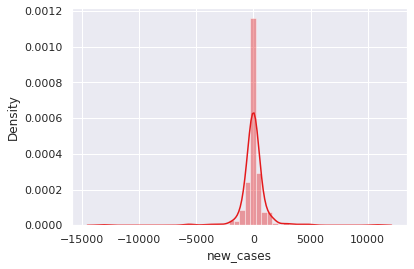

In [25]:
sns.distplot(remainder)

## Aggregate data

In [26]:
df_agg = pd.DataFrame(df.fillna('NA').groupby(['Date'])['confirmed'].sum().sort_values().reset_index())
df_agg['new_cases']= df_agg['confirmed']-df_agg['confirmed'].shift(1)
df_agg.dropna()

,Date,confirmed,new_cases
1,2020-01-23,654,99.0
2,2020-01-24,941,287.0
3,2020-01-25,1434,493.0
4,2020-01-26,2118,684.0
5,2020-01-27,2927,809.0
...,...,...,...
288,2020-11-05,48700238,593225.0
289,2020-11-06,49341371,641133.0
290,2020-11-07,49852945,511574.0
291,2020-11-08,50417767,564822.0


In [27]:
df_agg['Date'] = pd.to_datetime(df_agg['Date'])

df_agg.set_index('Date',inplace = True)

In [28]:
df_agg

,confirmed,new_cases
Date,,
2020-01-22,555,NaN
2020-01-23,654,99.0
2020-01-24,941,287.0
2020-01-25,1434,493.0
2020-01-26,2118,684.0
...,...,...
2020-11-05,48700238,593225.0
2020-11-06,49341371,641133.0
2020-11-07,49852945,511574.0


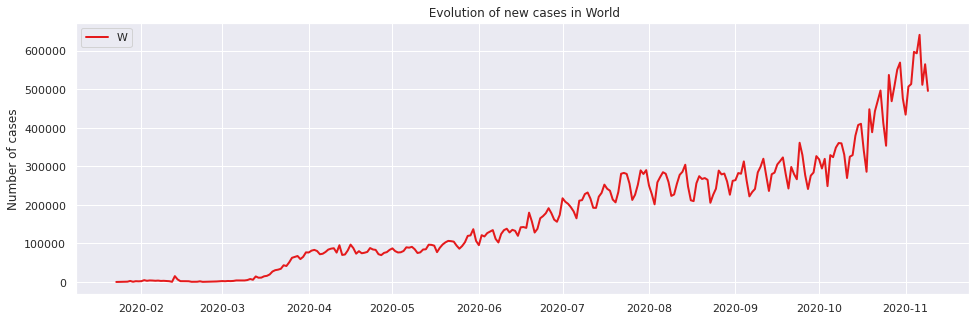

In [29]:
f,ax=plt.subplots(figsize=(16,5))
labels='World' 
plt.plot(df_agg.index,df_agg['new_cases'],linewidth=2)
#plt.xticks(country.resample('M').min().index)
plt.legend(labels)
ax.set(title=f' Evolution of new cases in World', ylabel='Number of cases')

    #plt.xticks([])
plt.legend(labels)
    #ax.set(title=' Evolution of cases in %d days difference '%time ,ylabel='Number of %s cases'%case )

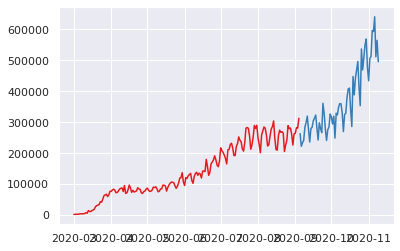

In [30]:
y_train_agg = df_agg['new_cases'].loc['2020-03-01':'2020-9-04'].dropna()

y_eval_agg = df_agg['new_cases'].loc['2020-9-05':]

fig, ax = plt.subplots()
ax.plot(y_train_agg)
ax.plot(y_eval_agg)

In [31]:
# fit stepwise auto-ARIMA

stepwise_fit_1 = pm.auto_arima(np.log(df_agg['new_cases'].loc['2020-03-01':].values), start_p=1, start_q=1,
                             max_p=3, max_q=3, m=7,
                             start_P=0, seasonal=True,
                             d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=-406.117, Time=3.28 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=-268.037, Time=0.14 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=-381.295, Time=1.37 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=-395.787, Time=1.76 sec
 ARIMA(1,1,1)(0,1,0)[7]             : AIC=-371.699, Time=0.28 sec
 ARIMA(1,1,1)(1,1,1)[7]             : AIC=-409.189, Time=8.83 sec
 ARIMA(1,1,1)(1,1,0)[7]             : AIC=-392.623, Time=6.90 sec
 ARIMA(1,1,1)(2,1,1)[7]             : AIC=-407.246, Time=16.45 sec
 ARIMA(1,1,1)(1,1,2)[7]             : AIC=-406.927, Time=11.13 sec
 ARIMA(1,1,1)(0,1,2)[7]             : AIC=-408.876, Time=10.40 sec
 ARIMA(1,1,1)(2,1,0)[7]             : AIC=-403.970, Time=6.17 sec
 ARIMA(1,1,1)(2,1,2)[7]             : AIC=-405.622, Time=8.46 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=-399.344, Time=3.20 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=-403.793, Time=2.46 sec
 ARIMA(2,1,1)(1,1,1)[7]       

In [32]:
y_eval_agg.shape

(66,)

In [33]:
stepwise_fit_1.fit(np.log(y_train_agg))
y_pred_agg=stepwise_fit_1.predict(n_periods=len(y_eval_agg))
y_pred_agg_df=pd.DataFrame({'cases':y_pred_agg},index=y_eval_agg.index)

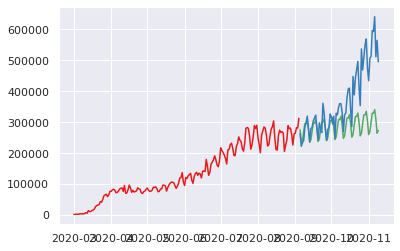

In [34]:
fig, ax = plt.subplots()
ax.plot(y_train_agg)
ax.plot(np.exp(y_pred_agg_df), color='g')
ax.plot(y_eval_agg)